Visit www.analyzewithahmed.tech

In [190]:
import numpy as np
import pandas as pd

In [191]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [192]:
from datetime import datetime


In [193]:
df = pd.read_csv('911.csv')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [238]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Subtype,Year,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015,17,12,Thu,2015-12-10


In [196]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [197]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [198]:
df['title'].nunique()

110

In [199]:
x = df['title'].iloc[0]

In [200]:
x.split(':')[1]

' BACK PAINS/INJURY'

In [257]:
df['Dept'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason'] = df['title'].apply(lambda title: title.split(':')[1])

In [260]:
df['Reason'].head()

0      BACK PAINS/INJURY
1     DIABETIC EMERGENCY
2          GAS-ODOR/LEAK
3      CARDIAC EMERGENCY
4              DIZZINESS
Name: Reason, dtype: object

In [258]:
df['Dept'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Dept, dtype: object

In [259]:
df['Dept'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Dept, dtype: int64

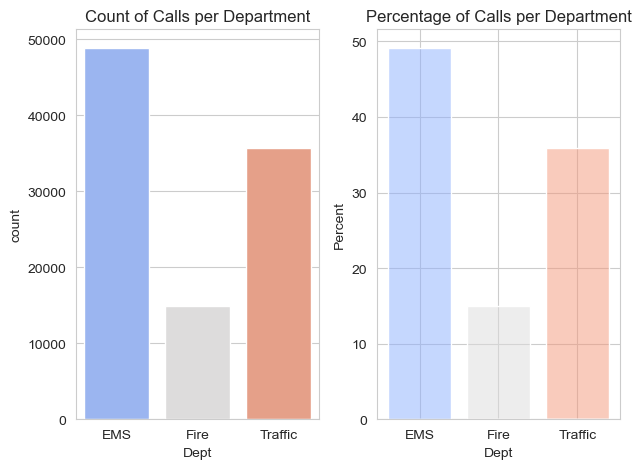

In [265]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='Dept',data=df,palette='coolwarm',ax=ax[0]).set(title='Count of Calls per Department')
sns.histplot(df, x='Dept',hue='Dept', stat="percent", shrink=.8, palette='coolwarm',
             legend=False,ax=ax[1]).set(title='Percentage of Calls per Department')
plt.tight_layout()

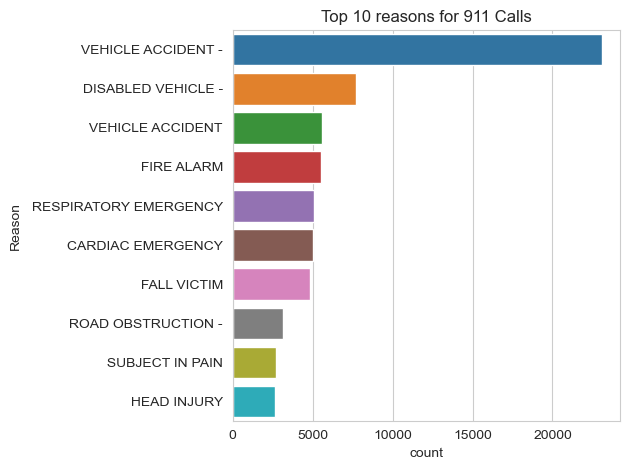

In [314]:
sns.countplot(y='Reason',data=df,order=df.Reason.value_counts().iloc[:10].index).set(title='Top 10 reasons for 911 Calls')
plt.tight_layout()


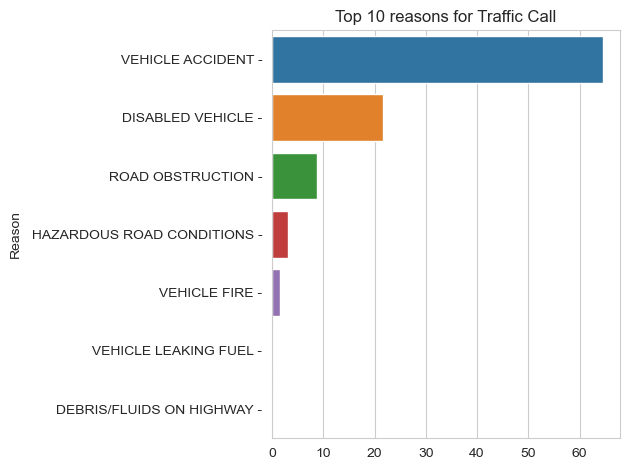

In [317]:
result = df[df['Dept']=='Traffic'].groupby(['Reason']).size().transform(lambda x: x/sum(x)*100).nlargest(10)
 

sns.barplot(x = result.values, y = result.index).set(title='Top 10 reasons for Traffic Call')


plt.tight_layout()


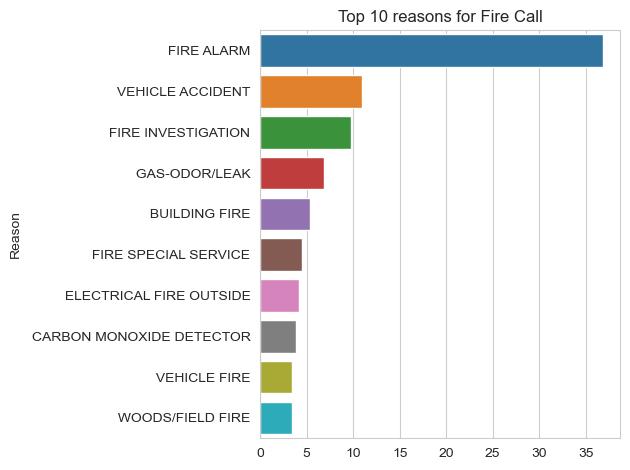

In [316]:
result = df[df['Dept']=='Fire'].groupby(['Reason']).size().transform(lambda x: x/sum(x)*100).nlargest(10)
sns.barplot(x = result.values, y = result.index).set(title='Top 10 reasons for Fire Call')
plt.tight_layout()

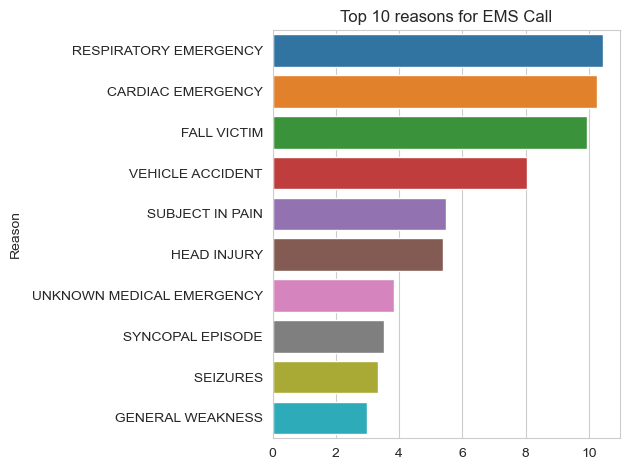

In [318]:
result = df[df['Dept']=='EMS'].groupby(['Reason']).size().transform(lambda x: x/sum(x)*100).nlargest(10)

sns.barplot(x = result.values, y = result.index).set(title='Top 10 reasons for EMS Call')
plt.tight_layout()


In [210]:
temp.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
Subtype,,,,,,,,,,,,,,
DEBRIS/FLUIDS ON HIGHWAY -,67,67,67,62,67,67,67,66,67,67,67,67,67,67
DISABLED VEHICLE -,7702,7702,7702,5791,7702,7702,7701,7405,7702,7702,7702,7702,7702,7702
HAZARDOUS ROAD CONDITIONS -,1086,1086,1086,969,1086,1086,1085,1068,1086,1086,1086,1086,1086,1086
ROAD OBSTRUCTION -,3144,3144,3144,2505,3144,3144,3144,3127,3144,3144,3144,3144,3144,3144
VEHICLE ACCIDENT -,23066,23066,23066,19536,23066,23066,23066,22910,23066,23066,23066,23066,23066,23066


In [319]:
type(df['timeStamp'].iloc[0])

str

In [322]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [323]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [324]:
df['Year'] = df['timeStamp'].apply(lambda time: time.year)
df['Year'].unique()

array([2015, 2016])

In [329]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [330]:
time

Timestamp('2015-12-10 17:40:00')

In [420]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Day'] = df['timeStamp'].apply(lambda time: time.day)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)


In [354]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [355]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [356]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Reason,Year,Hour,Day,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,3,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,3,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,17,3,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015,17,3,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015,17,3,Thu,12


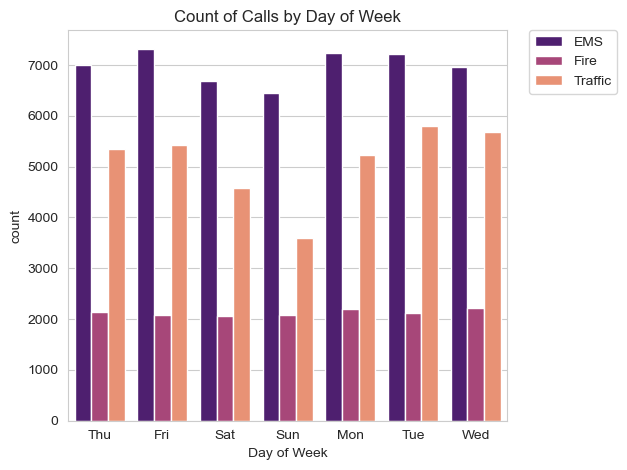

In [357]:
sns.countplot(x='Day of Week',data=df,hue='Dept',palette='magma')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Calls by Day of Week')
plt.tight_layout()

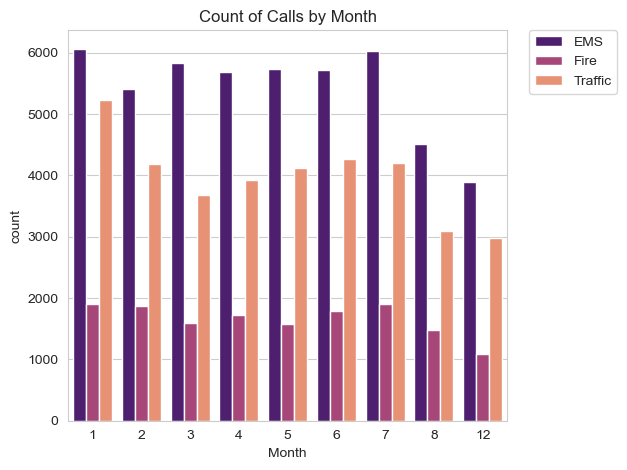

In [358]:
sns.countplot(x='Month',data=df,hue='Dept',palette='magma')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Calls by Month')
plt.tight_layout()

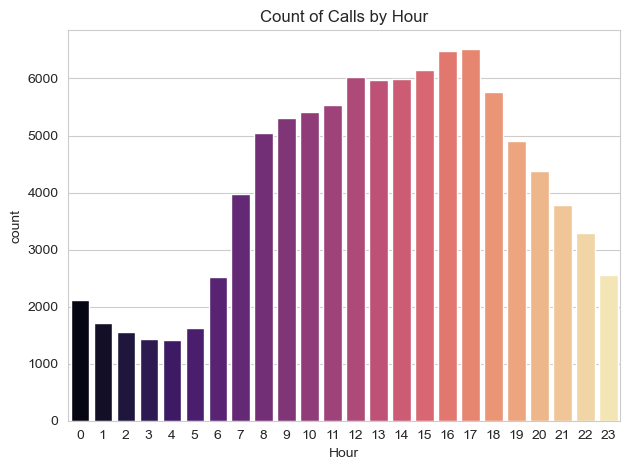

In [360]:
sns.countplot(x='Hour',data=df,palette='magma')
plt.title('Count of Calls by Hour')
plt.tight_layout()

In [363]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Reason,Year,Hour,Day,Day of Week
Month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423


Text(0.5, 1.0, 'Count of Calls by Month')

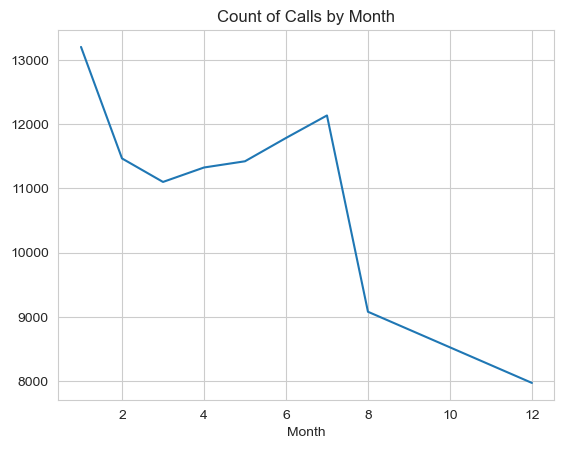

In [364]:
byMonth['lat'].plot()
plt.title('Count of Calls by Month')

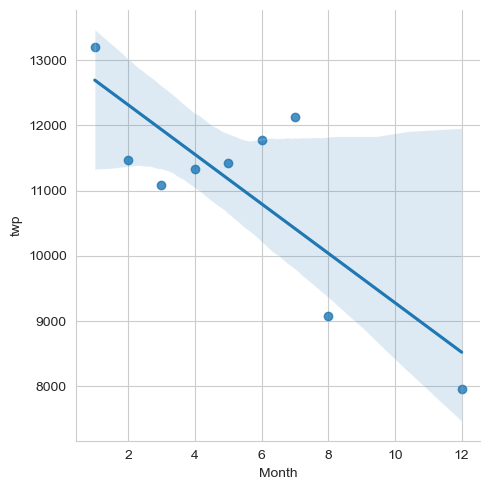

In [226]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [365]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [366]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

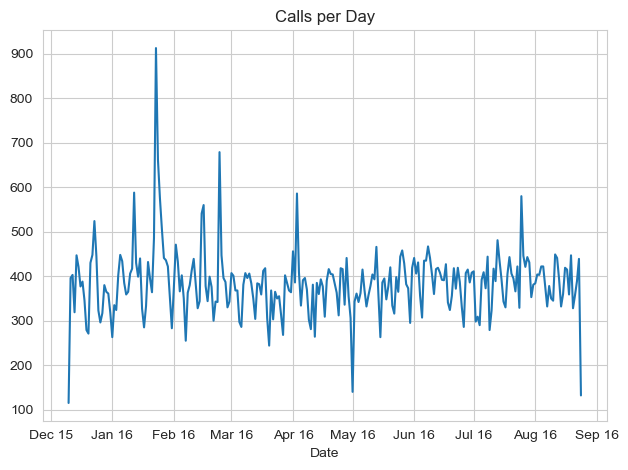

In [410]:
date_axes = df.groupby('Date').count()['lat'].plot()

myFmt=DateFormatter("%b %y")
date_axes.xaxis.set_major_formatter(myFmt)
plt.title('Calls per Day')
plt.tight_layout()

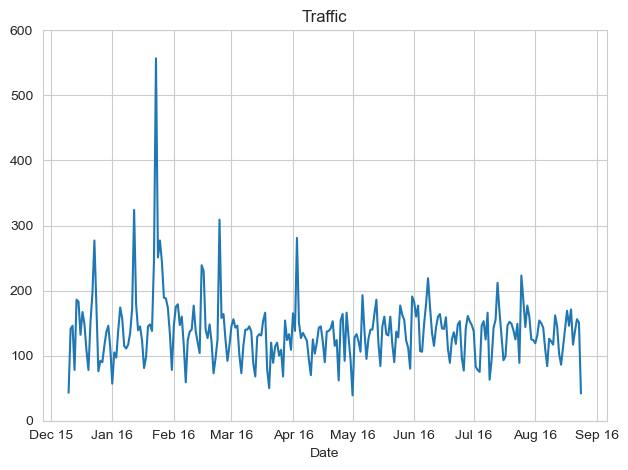

In [411]:
traffic = df[df['Dept']=='Traffic'].groupby('Date').count()['lat'].plot()
traffic.xaxis.set_major_formatter(myFmt)
plt.title('Traffic')
plt.ylim(0,600)
plt.tight_layout()


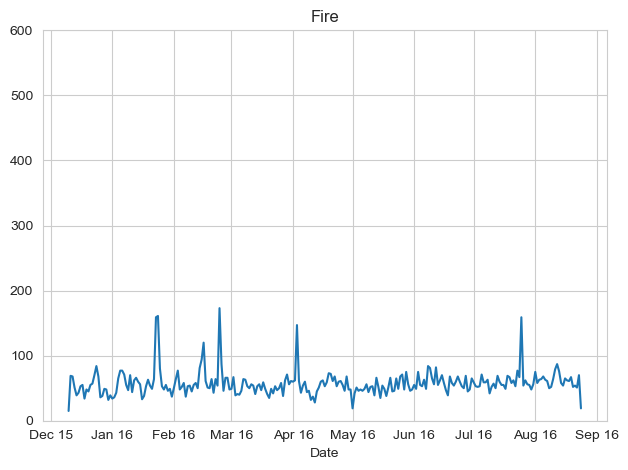

In [408]:
fire = df[df['Dept']=='Fire'].groupby('Date').count()['lat'].plot()
fire.xaxis.set_major_formatter(myFmt)
plt.title('Fire')
plt.ylim(0,600)
plt.tight_layout()

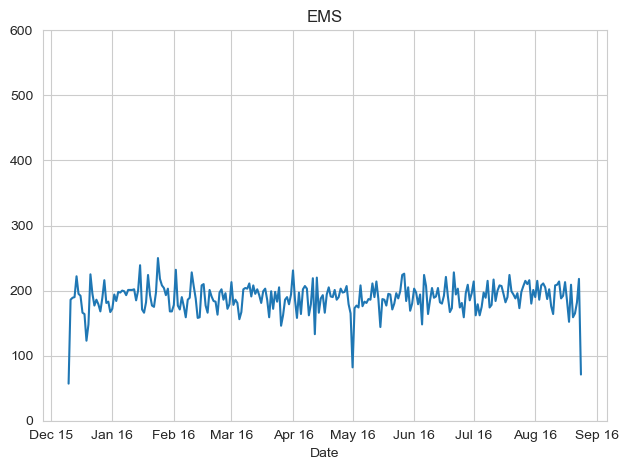

In [409]:
ems = df[df['Dept']=='EMS'].groupby('Date').count()['lat'].plot()
ems.xaxis.set_major_formatter(myFmt)
plt.title('EMS')
plt.ylim(0,600)
plt.tight_layout()

In [412]:
dayhour = df.groupby(by=['Day of Week','Hour']).count()['Dept'].unstack()
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Text(0.5, 1.0, 'Calls by Hour and Day of Weak')

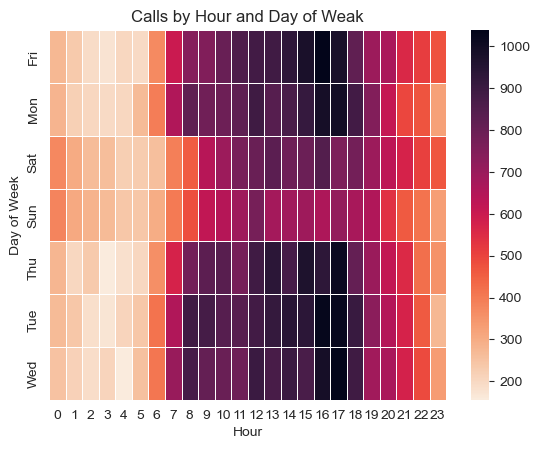

In [425]:
cmap = sns.cm.rocket_r

sns.heatmap(dayhour, cmap =cmap,linecolor='white',linewidth=0.5)
plt.title('Calls by Hour and Day of Weak')

Text(0.5, 1.0, 'Calls by Hour and Day')

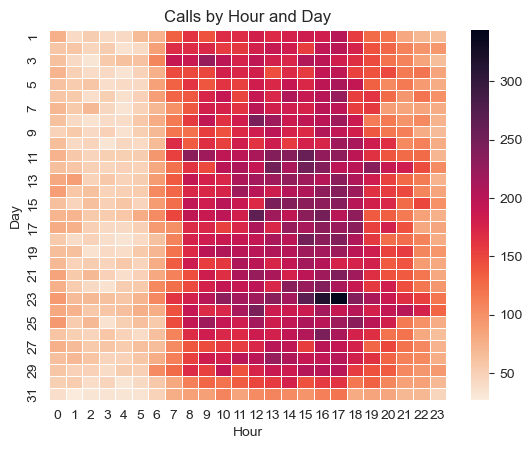

In [424]:
hourday = df.groupby(by=['Day','Hour']).count()['Dept'].unstack()
cmap = sns.cm.rocket_r

sns.heatmap(hourday, cmap =cmap,linecolor='white',linewidth=0.5)
plt.title('Calls by Hour and Day')

Text(0.5, 1.0, 'Calls by Month and Day')

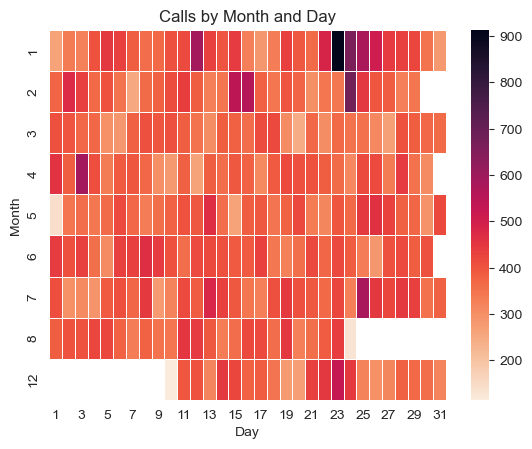

In [426]:
monthday = df.groupby(by=['Month','Day']).count()['Dept'].unstack()
cmap = sns.cm.rocket_r

sns.heatmap(monthday, cmap =cmap,linecolor='white',linewidth=0.5)
plt.title('Calls by Month and Day')

In [427]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Dept'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

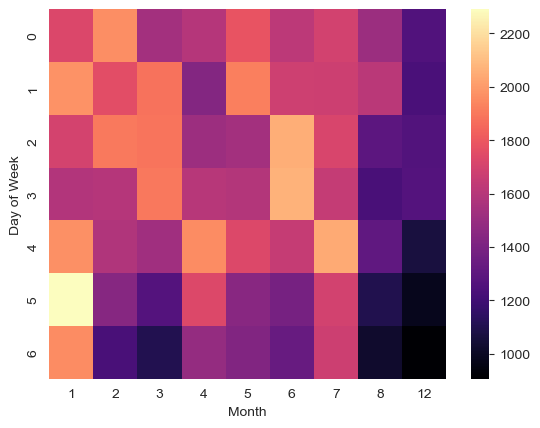

In [428]:
sns.heatmap(dayMonth, cmap ='magma')

Text(0.5, 1.0, 'Vehicle Accident by Hour and Day')

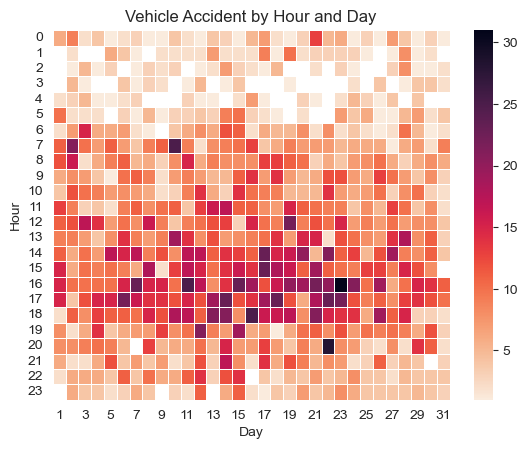

In [458]:
#New dataframe filtering ou
df2=df.query("Reason == ' VEHICLE ACCIDENT'")
monthday = df2.groupby(by=['Hour','Day']).count()['Reason'].unstack()
cmap = sns.cm.rocket_r

sns.heatmap(monthday, cmap =cmap,linecolor='white',linewidth=0.5)
plt.title('Vehicle Accident by Hour and Day')


Text(0.5, 1.0, 'Cardiac Emergency Month and Day')

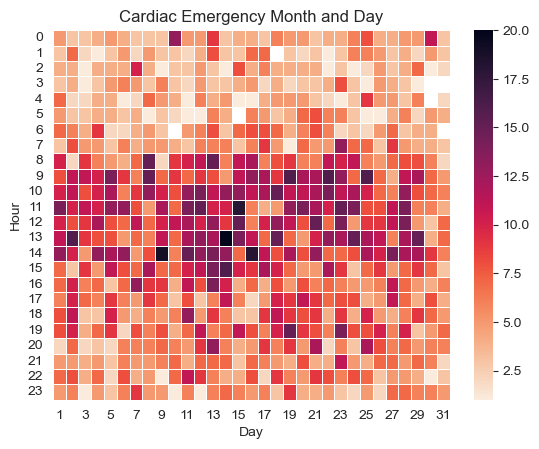

In [459]:
#New dataframe filtering CARDIAC EMERGENCY
df3=df.query("Reason == ' CARDIAC EMERGENCY'")
monthday = df3.groupby(by=['Hour','Day']).count()['Reason'].unstack()
cmap = sns.cm.rocket_r

sns.heatmap(monthday, cmap =cmap,linecolor='white',linewidth=0.5)
plt.title('Cardiac Emergency Month and Day')
